# Exercise: K-Means Clustering

In [77]:
import pandas as pd
pd.options.plotting.backend = "plotly"
#import cufflinks as cf
import matplotlib.pyplot as plt

animalData = pd.read_csv('Data/2021-11-ml-09-k-means-animals-dataset.csv')
animalData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Region               344 non-null    object 
 1   Stage                344 non-null    object 
 2   Individual ID        344 non-null    object 
 3   Culmen Length (mm)   342 non-null    float64
 4   Culmen Depth (mm)    342 non-null    float64
 5   Flipper Length (mm)  342 non-null    float64
 6   Body Mass (g)        342 non-null    float64
 7   Delta 15 N (o/oo)    330 non-null    float64
 8   Delta 13 C (o/oo)    331 non-null    float64
 9   Comments             26 non-null     object 
dtypes: float64(6), object(4)
memory usage: 27.0+ KB


In [78]:
# It looks like there may be a few missing values. Let's check to see if there are any rows that have almost all empty
animalData.dropna(thresh=4, axis=0, inplace=True)
animalData.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 343 entries, 0 to 343
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Region               343 non-null    object 
 1   Stage                343 non-null    object 
 2   Individual ID        343 non-null    object 
 3   Culmen Length (mm)   342 non-null    float64
 4   Culmen Depth (mm)    342 non-null    float64
 5   Flipper Length (mm)  342 non-null    float64
 6   Body Mass (g)        342 non-null    float64
 7   Delta 15 N (o/oo)    330 non-null    float64
 8   Delta 13 C (o/oo)    331 non-null    float64
 9   Comments             26 non-null     object 
dtypes: float64(6), object(4)
memory usage: 29.5+ KB


This dropped one row but there are still missing values. Let's impute some value in them. This can be done here because we aren't breaking into a Training and Testing sets

In [79]:
from sklearn.impute import SimpleImputer
import numpy as np

cols = ('Culmen Length (mm)', 'Culmen Depth (mm)',
        'Flipper Length (mm)', 'Body Mass (g)',
        'Delta 15 N (o/oo)', 'Delta 13 C (o/oo)')

## Impute the numerical values to the mean
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
for col in cols:
    animalData[col] = imp_mean.fit_transform(
        animalData[col].to_numpy().reshape(-1, 1))

print(animalData.describe())


       Culmen Length (mm)  Culmen Depth (mm)  Flipper Length (mm)  \
count          343.000000         343.000000           343.000000   
mean            43.921930          17.151170           200.915205   
std              5.451596           1.971904            14.041141   
min             32.100000          13.100000           172.000000   
25%             39.250000          15.600000           190.000000   
50%             44.400000          17.300000           197.000000   
75%             48.500000          18.700000           213.000000   
max             59.600000          21.500000           231.000000   

       Body Mass (g)  Delta 15 N (o/oo)  Delta 13 C (o/oo)  
count     343.000000         343.000000         343.000000  
mean     4201.754386           8.733382         -25.686292  
std       800.781229           0.541182           0.779908  
min      2700.000000           7.632200         -27.018540  
25%      3550.000000           8.306660         -26.290370  
50%      405

In [80]:
# Check if anything looks weird
animalData.describe()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000
mean,43.921930,17.151170,200.915205,4201.754386,8.733382,-25.686292
std,5.451596,1.971904,14.041141,800.781229,0.541182,0.779908
min,32.100000,13.100000,172.000000,2700.000000,7.632200,-27.018540
25%,39.250000,15.600000,190.000000,3550.000000,8.306660,-26.290370
50%,44.400000,17.300000,197.000000,4050.000000,8.687440,-25.795290
75%,48.500000,18.700000,213.000000,4750.000000,9.138720,-25.085255
max,59.600000,21.500000,231.000000,6300.000000,10.025440,-23.787670


## Setup and Tuning the Model
1. Remove all of the categorical columns and ones that won't help.
2. Standardize the remaining columns

In [81]:
animalData.drop(['Region','Stage','Individual ID','Comments'], axis=1, inplace=True)
animalData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 343 entries, 0 to 343
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Culmen Length (mm)   343 non-null    float64
 1   Culmen Depth (mm)    343 non-null    float64
 2   Flipper Length (mm)  343 non-null    float64
 3   Body Mass (g)        343 non-null    float64
 4   Delta 15 N (o/oo)    343 non-null    float64
 5   Delta 13 C (o/oo)    343 non-null    float64
dtypes: float64(6)
memory usage: 18.8 KB


Standardize the remaining numeric columns to have mean = 0 and standard deviation = 1.

In [82]:
from sklearn.preprocessing import StandardScaler

cols = animalData.columns
scaler = StandardScaler()
animalData = pd.DataFrame(scaler.fit_transform(animalData))
animalData.columns = cols
animalData.describe()


,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,3.430000e+02,3.430000e+02,3.430000e+02,3.430000e+02,3.430000e+02,3.430000e+02
mean,-2.887227e-16,5.140041e-16,-7.541748e-16,2.537653e-16,-9.810746e-16,-1.984160e-15
std,1.001461e+00,1.001461e+00,1.001461e+00,1.001461e+00,1.001461e+00,1.001461e+00
min,-2.171694e+00,-2.057447e+00,-2.062329e+00,-1.878101e+00,-2.037745e+00,-1.710709e+00
25%,-8.582358e-01,-7.877847e-01,-7.785088e-01,-8.150872e-01,-7.896515e-01,-7.756828e-01
50%,8.782173e-02,7.558575e-02,-2.792454e-01,-1.897848e-01,-8.501544e-02,-1.399623e-01
75%,8.409938e-01,7.865967e-01,8.619279e-01,6.856386e-01,7.500814e-01,7.717767e-01
max,2.880069e+00,2.208619e+00,2.145748e+00,2.624076e+00,2.390963e+00,2.437975e+00


Check the correlation to see what might make sense to graph later

In [83]:
animalData.corr().round(3)

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
Culmen Length (mm),1.000,-0.235,0.656,0.595,-0.059,0.186
Culmen Depth (mm),-0.235,1.000,-0.584,-0.472,0.596,0.424
Flipper Length (mm),0.656,-0.584,1.000,0.871,-0.495,-0.367
Body Mass (g),0.595,-0.472,0.871,1.000,-0.530,-0.370
Delta 15 N (o/oo),-0.059,0.596,-0.495,-0.530,1.000,0.566
Delta 13 C (o/oo),0.186,0.424,-0.367,-0.370,0.566,1.000


3. Create a model for each value of K from 2 through 5, inclusive. Create a scatterplot for each model, using color to distinguish between clusters.
4. Create additional models for K=6 through K=9, inclusive. Then generate a scree plot for all 8 models you've created. (Hint: use the .inertia_ attribute of your K-means instance as your vertical axis values.) Judging from the scree plot, what appears to be a reasonable choice of K for this data set?

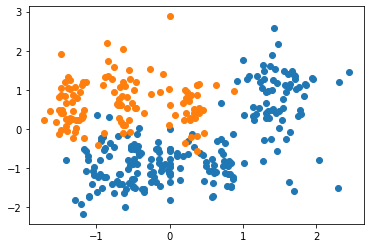

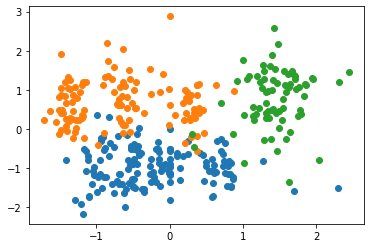

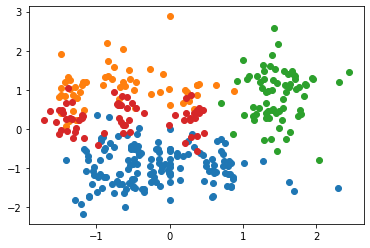

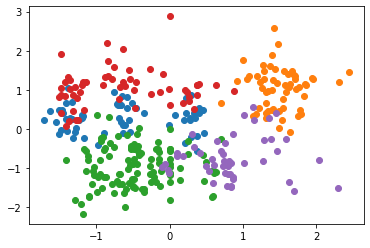

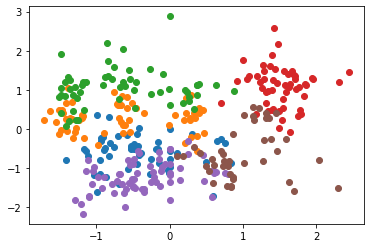

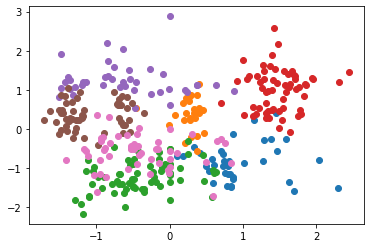

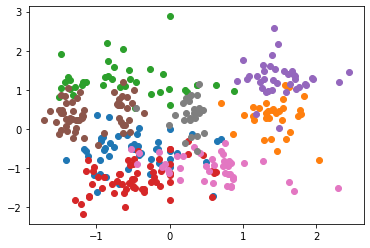

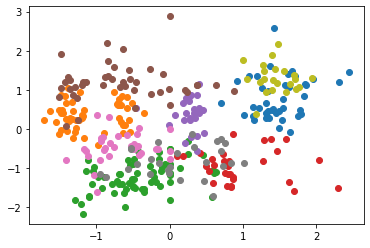

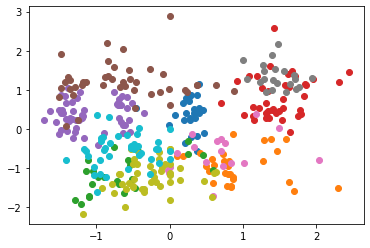

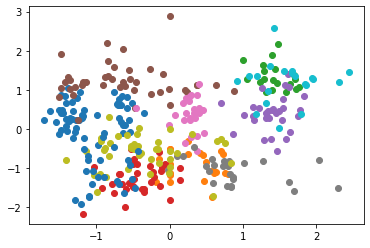

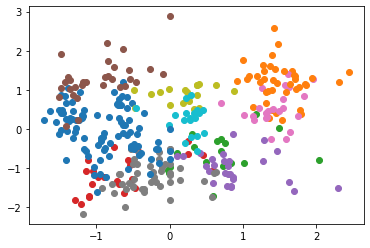

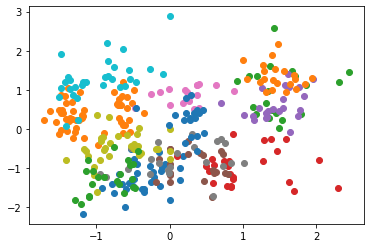

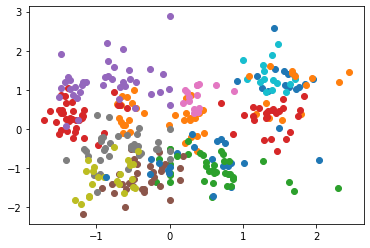

       K      inertia
0    2.0  1023.336016
1    3.0   685.074270
2    4.0   604.786433
3    5.0   525.275073
4    6.0   465.628916
5    7.0   425.978881
6    8.0   394.843941
7    9.0   374.771043
8   10.0   351.335980
9   11.0   337.689442
10  12.0   317.045579
11  13.0   300.230690
12  14.0   296.333016


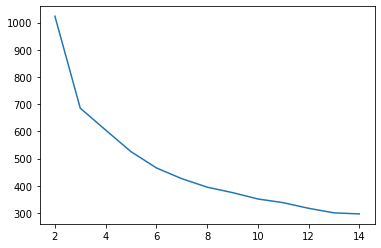

In [84]:
from sklearn.cluster import KMeans

inertia = pd.DataFrame(columns=['K','inertia'])
for K in range(2,15):
    model = KMeans(n_clusters = K, random_state = 42).fit(animalData)
    labels = model.labels_
    centers = model.cluster_centers_
    inertia = inertia.append(
        pd.Series([K, model.inertia_], index=inertia.columns), ignore_index=True)
    # Get a list of the unique labels
    labelList = list(set(labels))
    for i in labelList:
        rows = animalData.loc[labels==i]
        plt.scatter(x=rows['Delta 13 C (o/oo)'],
                    y=rows['Culmen Length (mm)'], label=i)
    plt.show()

print(inertia)
# Plot a scree plot with the inertia against K
plt.plot(inertia['K'], inertia['inertia'])
plt.show()
